<a href="https://colab.research.google.com/github/AleksandraOD/flaskProjectFinal/blob/main/prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.style as style
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)
style.use('fivethirtyeight')
import numpy as np

In [62]:
rent_df = pd.read_csv('/content/drive/MyDrive/MIBA/PM/cleaned_dataset.csv')

In [63]:
rent_df.head()

,first_day_exposition,last_day_exposition,last_price,open_plan,rooms,area,renovation,unified_address
0,2015-01-24T00:00:00+03:00,2016-01-19T00:00:00+03:00,20000.0,0,1,28.0,3.0,"Россия, Санкт-Петербург, Богатырский проспект, 5к1"
1,2015-01-25T00:00:00+03:00,2016-01-20T00:00:00+03:00,40000.0,0,2,72.0,0.0,"Россия, Санкт-Петербург, набережная реки Фонтанки, 66"
2,2015-01-25T00:00:00+03:00,2016-01-21T00:00:00+03:00,45000.0,0,2,55.0,0.0,"Россия, Санкт-Петербург, Большой проспект П.С., 102"
3,2015-01-28T00:00:00+03:00,2016-01-16T00:00:00+03:00,21000.0,0,1,35.0,11.0,"Россия, Санкт-Петербург, Лужская улица, 8"
4,2015-02-13T00:00:00+03:00,2016-01-23T00:00:00+03:00,25000.0,0,1,44.0,10.0,"Россия, Санкт-Петербург, Учительская улица, 3"


In [64]:
rent_df['renovation'].fillna(0.0, inplace=True)

In [65]:
rent_df['renovation'] = rent_df['renovation'].astype(int)

In [66]:
rent_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155563 entries, 0 to 155562
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   first_day_exposition  155563 non-null  object 
 1   last_day_exposition   155563 non-null  object 
 2   last_price            155563 non-null  float64
 3   open_plan             155563 non-null  int64  
 4   rooms                 155563 non-null  int64  
 5   area                  155563 non-null  float64
 6   renovation            155563 non-null  int64  
 7   unified_address       155563 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 9.5+ MB


In [67]:
train_df = rent_df[(rent_df.first_day_exposition >= '2018-01-01') 
                          & (rent_df.first_day_exposition < '2018-05-01')]

In [68]:
len(train_df)

23627

In [69]:
test_df = rent_df[(rent_df.first_day_exposition >= '2018-04-01') 
                          & (rent_df.first_day_exposition < '2018-07-01')]

In [13]:
len(test_df)

23955

In [70]:
holdout_df = rent_df[rent_df.first_day_exposition >= '2018-07-01']

In [15]:
len(holdout_df)

12167

In [71]:
train_df.drop(columns=['first_day_exposition','last_day_exposition', "unified_address"], inplace=True)
test_df.drop(columns=['first_day_exposition','last_day_exposition', "unified_address"], inplace=True)

<ipython-input-71-eb1e21940d0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.drop(columns=['first_day_exposition','last_day_exposition', "unified_address"], inplace=True)
<ipython-input-71-eb1e21940d0f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df.drop(columns=['first_day_exposition','last_day_exposition', "unified_address"], inplace=True)


In [72]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn import metrics
from sklearn.ensemble import RandomForestRegressor

In [79]:
X_train = train_df.drop('last_price', axis=1)
y_train = train_df['last_price']
X_valid = test_df.drop('last_price', axis=1)
y_valid = test_df['last_price']
y_train= y_train.values.reshape(-1,1)
y_valid= y_valid.values.reshape(-1,1)
print(X_train)

        open_plan  rooms   area  renovation
90710           0      3  120.0          10
90711           0      1   37.5           0
90712           0      1   42.0           0
90713           0      1   27.5           0
90714           0      0   28.0           0
...           ...    ...    ...         ...
155454          0      3   87.0           0
155519          0      2   75.0           0
155534          0      2   75.0           0
155539          0      2   90.0           0
155553          0      3  100.0          10

[23627 rows x 4 columns]


In [80]:
y_valid

array([[19000.],
       [23000.],
       [18000.],
       ...,
       [65000.],
       [70000.],
       [80000.]])

In [82]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_valid = sc_X.fit_transform(X_valid)
y_train = sc_y.fit_transform(y_train)
y_valid = sc_y.fit_transform(y_valid)

In [83]:
from sklearn.linear_model import LinearRegression
modelLN = LinearRegression()
modelLN.fit(X_train, y_train)

print('MAE:', metrics.mean_absolute_error(y_valid, modelLN.predict(X_valid)))
print('MSE:', metrics.mean_squared_error(y_valid, modelLN.predict(X_valid)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, modelLN.predict(X_valid))))

MAE: 0.358179072653329
MSE: 0.40943954152247397
RMSE: 0.6398746295349379


In [94]:
LNpredictions = modelLN.predict(X_valid)

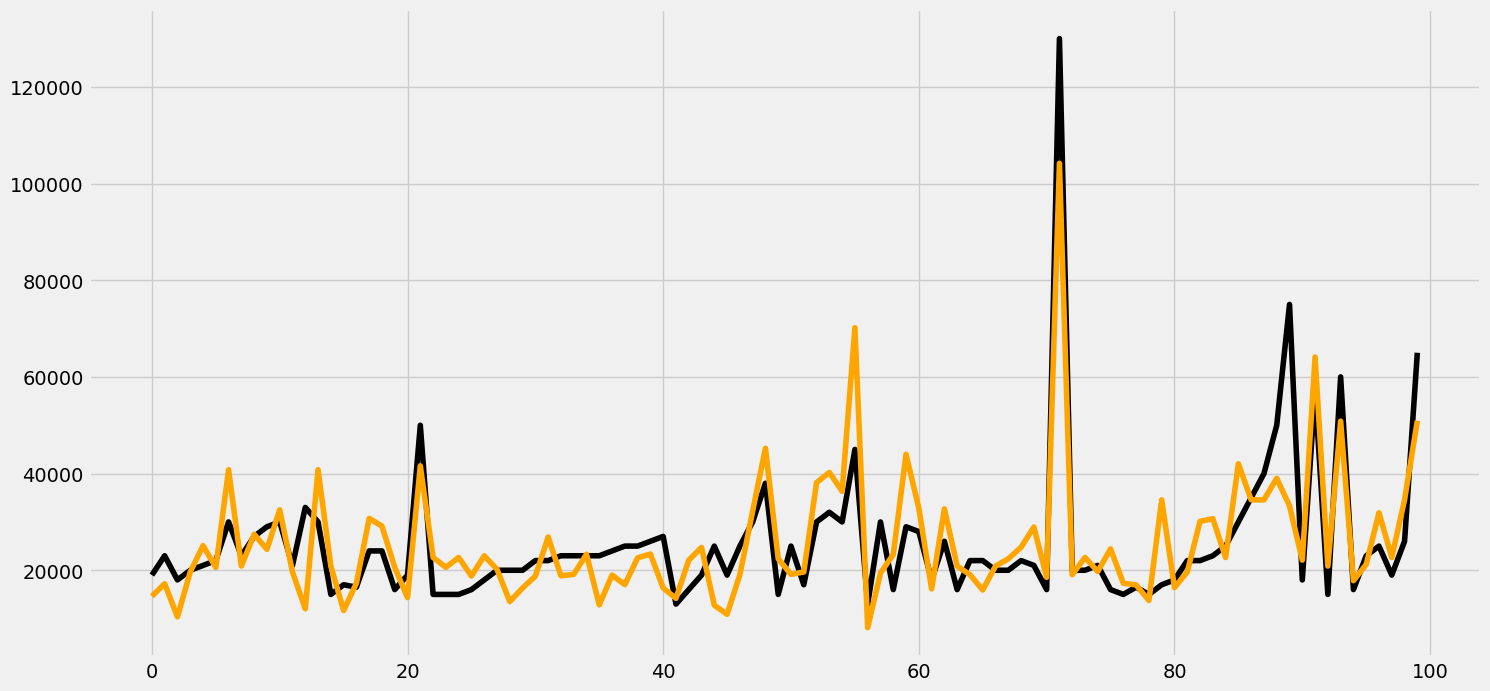

In [97]:
plt.figure(figsize=(16,8))
plt.plot(sc_y.inverse_transform(y_valid)[:100],label ='Test', color= 'black')
plt.plot(sc_y.inverse_transform(LNpredictions)[:100], label = 'predict', color = 'orange')
plt.show()

In [84]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [85]:
def LSTM_model():

    # Initialize a sequential model
    model = Sequential()

    # Add the first LSTM layer with 50 units, input shape, and return sequences
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a second LSTM layer with 50 units and return sequences
    model.add(LSTM(units=50, return_sequences=True))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a third LSTM layer with 50 units
    model.add(LSTM(units=50))
    # Add dropout to prevent overfitting
    model.add(Dropout(0.2))

    # Add a dense output layer with one unit
    model.add(Dense(units=1))

    return model

In [86]:
model = LSTM_model()
model.summary()
model.compile(
    optimizer='adam', 
    loss='mean_squared_error'
)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 4, 50)             10400     
                                                                 
 dropout_6 (Dropout)         (None, 4, 50)             0         
                                                                 
 lstm_7 (LSTM)               (None, 4, 50)             20200     
                                                                 
 dropout_7 (Dropout)         (None, 4, 50)             0         
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dropout_8 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                

In [87]:
checkpointer = ModelCheckpoint(
    filepath = '/content/drive/MyDrive/MIBA/PM/weights_best.hdf5', 
    verbose = 2, 
    save_best_only = True
)

model.fit(
    X_train, 
    y_train, 
    epochs=25, 
    batch_size = 32,
    callbacks = [checkpointer]
)

Epoch 1/25
739/739 [==============================] - ETA: 0s - loss: 0.5475

739/739 [==============================] - 18s 15ms/step - loss: 0.5475
Epoch 2/25
739/739 [==============================] - ETA: 0s - loss: 0.4732

739/739 [==============================] - 10s 14ms/step - loss: 0.4732
Epoch 3/25
739/739 [==============================] - ETA: 0s - loss: 0.4279

739/739 [==============================] - 10s 13ms/step - loss: 0.4279
Epoch 4/25
738/739 [============================>.] - ETA: 0s - loss: 0.4173

739/739 [==============================] - 10s 13ms/step - loss: 0.4176
Epoch 5/25
738/739 [============================>.] - ETA: 0s - loss: 0.4222

739/739 [==============================] - 10s 14ms/step - loss: 0.4221
Epoch 6/25
738/739 [============================>.] - ETA: 0s - loss: 0.4112

739/739 [==============================] - 10s 13ms/step - loss: 0.4112
Epoch 7/25
738/739 [============================>.] - ETA: 0s - loss: 0.4146

739/739 [==============================] - 10s 13ms/step - loss: 0.4145
Epoch 8/25
737/739 [============================>.] - ETA: 0s - loss: 0.4129

739/739 [==============================] - 12s 16ms/step - loss: 0.4127
Epoch 9/25
737/739 [============================>.] - ETA: 0s - loss: 0.4153

739/739 [==============================] - 11s 15ms/step - loss: 0.4148
Epoch 10/25
737/739 [============================>.] - ETA: 0s - loss: 0.4094

739/739 [==============================] - 13s 17ms/step - loss: 0.4092
Epoch 11/25
736/739 [============================>.] - ETA: 0s - loss: 0.4106

739/739 [==============================] - 10s 13ms/step - loss: 0.4105
Epoch 12/25
736/739 [============================>.] - ETA: 0s - loss: 0.4144

739/739 [==============================] - 12s 16ms/step - loss: 0.4137
Epoch 13/25
736/739 [============================>.] - ETA: 0s - loss: 0.4023

739/739 [==============================] - 11s 15ms/step - loss: 0.4019
Epoch 14/25
736/739 [============================>.] - ETA: 0s - loss: 0.4068

739/739 [==============================] - 11s 15ms/step - loss: 0.4066
Epoch 15/25
738/739 [============================>.] - ETA: 0s - loss: 0.4060

739/739 [==============================] - 10s 14ms/step - loss: 0.4059
Epoch 16/25
738/739 [============================>.] - ETA: 0s - loss: 0.4066

739/739 [==============================] - 11s 14ms/step - loss: 0.4064
Epoch 17/25
736/739 [============================>.] - ETA: 0s - loss: 0.4039

739/739 [==============================] - 12s 16ms/step - loss: 0.4042
Epoch 18/25
738/739 [============================>.] - ETA: 0s - loss: 0.4073

739/739 [==============================] - 11s 14ms/step - loss: 0.4071
Epoch 19/25
735/739 [============================>.] - ETA: 0s - loss: 0.4051

739/739 [==============================] - 10s 13ms/step - loss: 0.4040
Epoch 20/25
735/739 [============================>.] - ETA: 0s - loss: 0.4087

739/739 [==============================] - 11s 15ms/step - loss: 0.4076
Epoch 21/25
735/739 [============================>.] - ETA: 0s - loss: 0.3998

739/739 [==============================] - 11s 15ms/step - loss: 0.4006
Epoch 22/25
738/739 [============================>.] - ETA: 0s - loss: 0.4014

739/739 [==============================] - 13s 18ms/step - loss: 0.4012
Epoch 23/25
739/739 [==============================] - ETA: 0s - loss: 0.4057

739/739 [==============================] - 15s 20ms/step - loss: 0.4057
Epoch 24/25
735/739 [============================>.] - ETA: 0s - loss: 0.3983

739/739 [==============================] - 10s 13ms/step - loss: 0.3990
Epoch 25/25
739/739 [==============================] - ETA: 0s - loss: 0.4043

739/739 [==============================] - 10s 14ms/step - loss: 0.4043


In [88]:
predicted_prices = model.predict(X_valid)

749/749 [==============================] - 4s 4ms/step


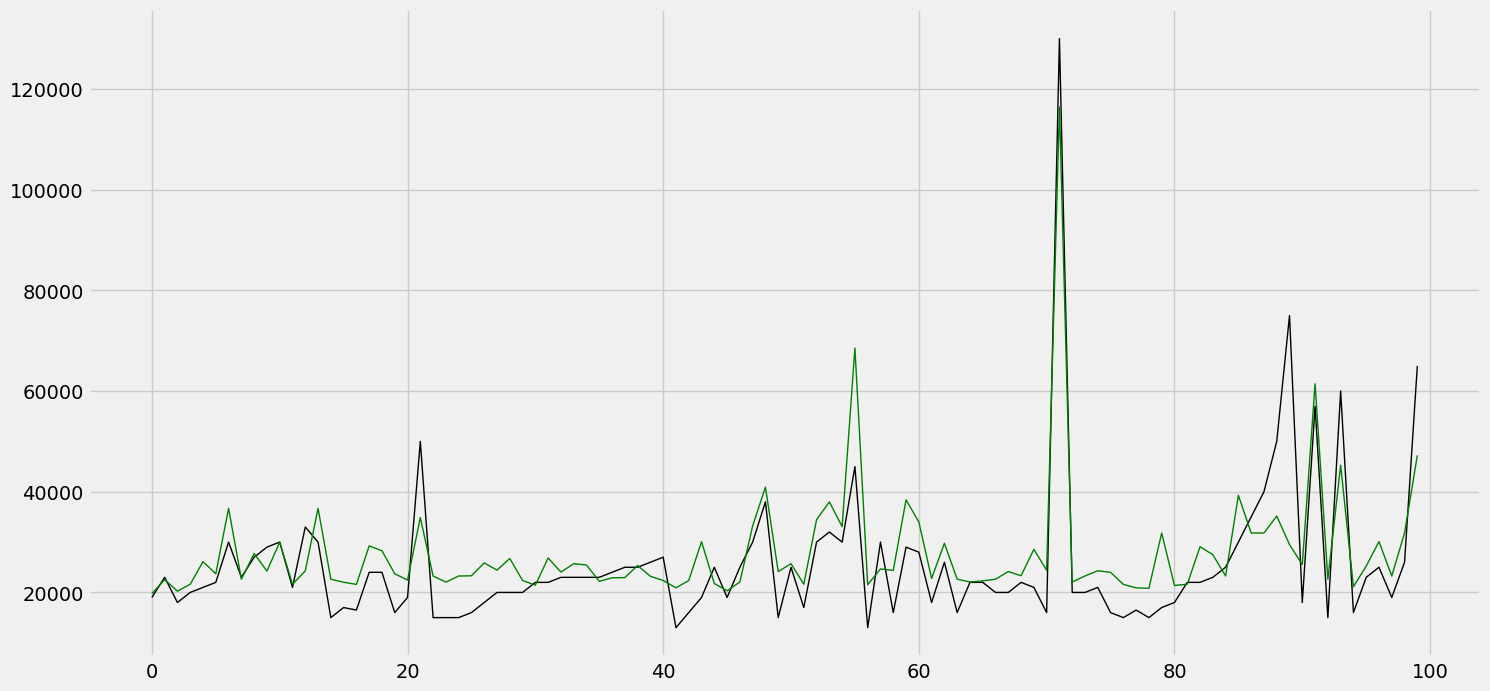

In [98]:
# LTSM
plt.figure(figsize=(16,8))
plt.plot(sc_y.inverse_transform(y_valid)[:100], color='black', label=f"Actual price", linewidth=1, markersize=3)
plt.plot(sc_y.inverse_transform(predicted_prices)[:100], color='green', label=f"Predicted price", linewidth=1, markersize=3)
plt.show()

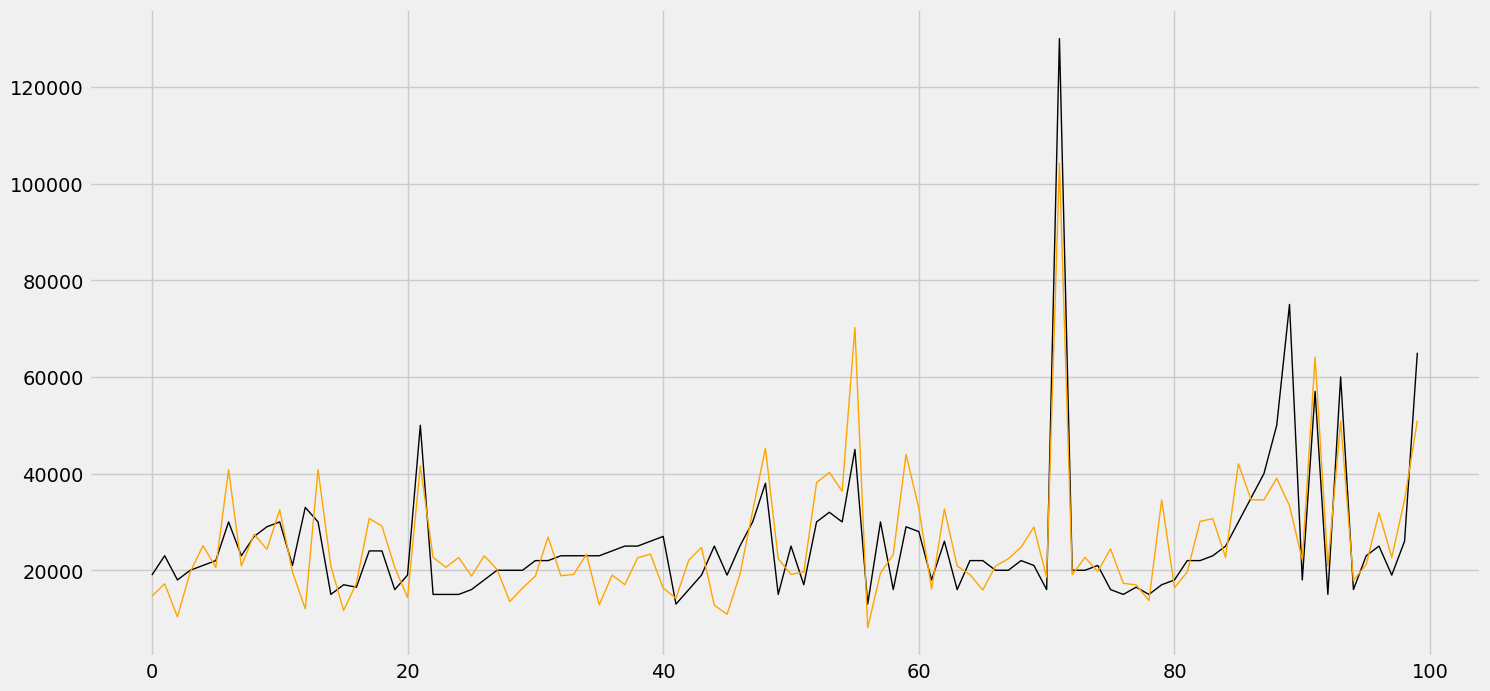

In [100]:
# Linear regression
plt.figure(figsize=(16,8))
plt.plot(sc_y.inverse_transform(y_valid)[:100],label ='Test', color= 'black', linewidth=1, markersize=3)
plt.plot(sc_y.inverse_transform(LNpredictions)[:100], label = 'predict', color = 'orange', linewidth=1, markersize=3)
plt.show()

In [92]:
# LTSM
print('MAE:', metrics.mean_absolute_error(y_valid, predicted_prices))
print('MSE:', metrics.mean_squared_error(y_valid, predicted_prices))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, predicted_prices)))

MAE: 0.34607138314945196
MSE: 0.4033837206877859
RMSE: 0.6351249646233298


In [93]:
# Linear regression
print('MAE:', metrics.mean_absolute_error(y_valid, modelLN.predict(X_valid)))
print('MSE:', metrics.mean_squared_error(y_valid, modelLN.predict(X_valid)))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_valid, modelLN.predict(X_valid))))

MAE: 0.358179072653329
MSE: 0.40943954152247397
RMSE: 0.6398746295349379


In [102]:
import joblib

In [104]:
model_file = '/content/drive/MyDrive/MIBA/PM/model.pkl'
scaler_x = '/content/drive/MyDrive/MIBA/PM/scaler_x.pkl'
scaler_y = '/content/drive/MyDrive/MIBA/PM/scaler_y.pkl'
joblib.dump(sc_X, scaler_x)
joblib.dump(sc_y, scaler_y)
joblib.dump(model, model_file)

['/content/drive/MyDrive/MIBA/PM/model.pkl']